#### Margin을 최대화한다 -> 가중치벡터의 norm을 최소로 만든다
- 결론적으로 새로운 데이터가 들어갔을 때, 서포트벡터와의 유사도를 계산해서 유사도가 +/-쪽 중 큰 쪽으로 가야 마진이 최대가 된다. 
- y값은 -1/1 값을 갖는다.

In [2]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y -1 # 1, -1로 바꿔주기

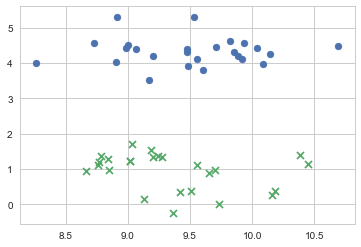

In [3]:
plt.scatter(x[y==1,0], x[y==1,1], marker='o')
plt.scatter(x[y==-1,0], x[y==-1,1], marker='x')
plt.show()

In [4]:
from sklearn.svm import SVC

In [5]:
model_svc = SVC(C=1e10, kernel='linear').fit(x,y)

In [7]:
model_svc.n_support_ # 각 클래스의 서포트벡터의 갯수

array([1, 1])

각 클래스에 서포트벡터가 1개씩 있다.

In [8]:
model_svc.support_

array([42,  1])

첫번째 클래스에선 index=42,
두번째 클래스에선 index=1이 서포트벡터다.

In [18]:
model_svc.support_vectors_

array([ 9.03715314,  9.17124955])

서포트벡터의 값(좌표...)

In [10]:
y[model_svc.support_]

array([-1,  1])

첫번째 클래스가 -1이었네...두번째 클래스는 1

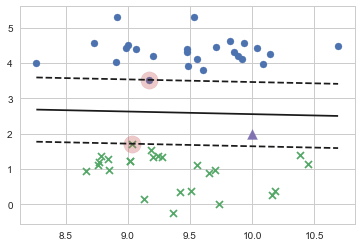

In [20]:
xmin = x[:,0].min()
xmax = x[:,0].max()
ymin = x[:,1].min()
ymax = x[:,1].max()
xx, yy = np.linspace(xmin, xmax, 10), np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx,yy)

z = np.empty(X1.shape)
for (i,j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i,j]
    p = model_svc.decision_function([[x1,x2]])
    z[i,j] = p[0]

levels = [-1, 0, 1]
linestyles = ['dashed','solid','dashed']

plt.scatter(x[y==1,0], x[y==1,1], marker='o')
plt.scatter(x[y==-1,0], x[y==-1,1], marker='x')
plt.contour(X1, X2, z, levels, colors='k', linestyles=linestyles)
plt.scatter(model_svc.support_vectors_[:,0], model_svc.support_vectors_[:,1],
            s=300, alpha=0.3)
x_new = [10,2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.show()

점선이 서포트벡터라인, 가운데 선이 판별함수

In [21]:
model_svc.decision_function([x_new])

array([-0.61101582])

In [22]:
model_svc.coef_.dot(x_new) + model_svc.intercept_

array([-0.61101582])

두 가지 방식으로 구할 수 있다.

In [23]:
model_svc.dual_coef_

array([[-0.60934379,  0.60934379]])

일단 클래스 별로 하나씩 나온 것이다.

##### f(x) = a^+ * x.T * x^+ - a^- * x.T * x^- - w0 (유사도)를 직접 구해보자 

In [32]:
model_svc.dual_coef_[0,1]*model_svc.support_vectors_[1].dot(x_new) + \
model_svc.dual_coef_[0,0]*model_svc.support_vectors_[0].dot(x_new) + \
model_svc.intercept_

array([-0.61101582])

설명에서는 모두 빼라고 했는데, 막상 코드에서는 다 더하네???

##### 연습문제 1
붓꽃 문제를 서포트 벡터 머신으로 풀어보자. 다음과 같은 데이터만 사용한 이진 분류 문제로 바꾸어 풀어본다. 위의 예제와 마찬가지로 커널 인수 kernel과 슬랙 변수 가중치 인수 C는 각각 linear, 1e10으로 한다.

- 특징 변수를 꽃받침의 길이와 폭만 사용한다.
- 붓꽃 종을 Setosa와 Versicolour만 대상으로 한다.

In [34]:
from sklearn.datasets import load_iris
iris = load_iris()

In [64]:
idx = np.in1d(iris.target, [0,1])
x = iris.data[idx,2:4]
y = iris.target[idx]
y = 2*y - 1

In [65]:
svc = SVC(C=1e10, kernel='linear').fit(x,y)

In [83]:
xmin = x[:,0].min()
xmax = x[:,0].max()
ymin = x[:,1].min()
ymax = x[:,1].max()
xx, yy = np.linspace(xmin, xmax, 10), np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx,yy)

z = np.empty(X1.shape)
for (i,j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i,j]
    p = svc.decision_function([[x1,x2]])
    z[i,j] = p[0]

levels = [-1,0, 1]
linestyles = ['dashed','solid','dashed']

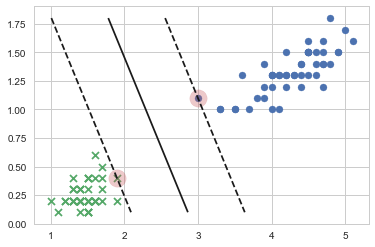

In [84]:
plt.scatter(x[y==1,0], x[y==1,1], marker='o')
plt.scatter(x[y==-1,0], x[y==-1,1], marker='x')
plt.contour(X1, X2, z, levels, colors='k', linestyles=linestyles)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1],
            s=300, alpha=0.3)
plt.show()

##### 슬랙변수

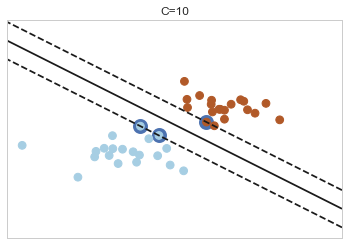

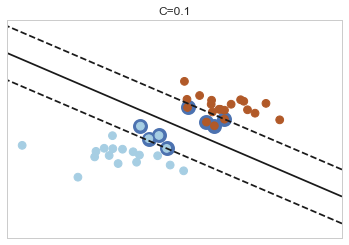

In [86]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

fignum = 1
for name, penalty in (('C=10', 10), ('C=0.1', 0.1)):
    clf = SVC(kernel='linear', C=penalty).fit(X, Y)
    xx = np.linspace(-5, 5)
    
    plt.figure(fignum)
    
    x_jin = -5; x_jax = 5
    y_jin = -9; y_jax = 9
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]
    
    levels = [-1, 0, 1]
    linestyles = ['dashed', 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired)

    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.xticks(())
    plt.yticks(())
    plt.title(name)
    plt.axis('tight')
    plt.show()
    
    fignum += 1

C값이 커지면 마진이 줄어든다.반대로 C값이 작아지면 마진이 커진다.

#### 연습문제 2
붓꽃 문제를 서포트 벡터 머신으로 풀어보자. 다음과 같은 데이터만 사용한 이진 분류 문제로 바꾸어 풀어본다. 위의 예제와 마찬가지로 커널 인수 kernel는 각각 linear로 한다. 슬랙 변수 가중치 인수 C를 여러가지 값으로 바꾸어 보면서 서포트가 어떻게 바뀌는지 살펴본다.

- 특징 변수를 꽃잎의 길이와 폭만 사용한다.
- 붓꽃 종을 Virginica와 Versicolour만 대상으로 한다.

##### 연습문제 3
MNIST Digit Image 분류 문제를 서포트 벡터 머신으로 풀어보자.